In [ ]:
!pip install py2neo


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/FINAL.csv'
df = pd.read_csv(file_path)

# Preview the dataset to understand its structure
print("Original Dataset:")
print(df.head())

# Step 1: Convert 'CVE' column to a list (if necessary)
def safe_convert_to_list(cve_value):
    # If the value is a string and contains a list-like format, convert it to a list
    if isinstance(cve_value, str):
        # Remove any potential extra whitespace or quotes
        cve_value = cve_value.strip()
        if cve_value.startswith('[') and cve_value.endswith(']'):
            # Convert the string representation of the list to an actual list
            cve_value = cve_value[1:-1].split(', ')
            return [item.strip() for item in cve_value]  # Split by commas and strip spaces
        else:
            # If it's not a list-like string, return it as a single item list
            return [cve_value]
    else:
        return cve_value  # Return as-is if it's already a list

# Apply the safe conversion to the 'CVE' column
df['CVE'] = df['CVE'].apply(safe_convert_to_list)

# Verify that the conversion has worked
print("\nData type of 'CVE' column after conversion:", df['CVE'].dtype)
print("\nPreview of CVE column after conversion:")
print(df['CVE'].head())

# Step 2: Explode the 'CVE' column into separate rows
expanded_df = df.explode('CVE')

# Step 3: Verify the expanded dataset
print("\nExpanded Dataset:")
print(expanded_df.head())

# Step 4: Save the expanded DataFrame if necessary
expanded_df.to_csv('/content/Expanded_FINAL.csv', index=False)


Original Dataset:
                                       User_Artifact  userReleaseCount  \
0  org.infinispan.server:infinispan-server-testsuite                29   
1  org.infinispan.server:infinispan-server-testsuite                29   
2                 org.apache.cassandra:cassandra-all               122   
3                 org.apache.cassandra:cassandra-all               122   
4                   org.apache.hive:hive-llap-server                 9   

                                   First_Vul_Release  Start_Vulnerability  \
0  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
1  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
2       org.apache.cassandra:cassandra-all:2.1.0-rc1         1.401467e+12   
3       org.apache.cassandra:cassandra-all:2.1.0-rc1         1.401467e+12   
4             org.apache.hive:hive-llap-server:3.0.0         1.526941e+12   

                                 First_Clean_Release  End_Vulnerablility  

In [ ]:
import pandas as pd

# Step 1: Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/6620/6620 MSR25 Project/CSV Files/merged_results_with_clean_release.csv'
df = pd.read_csv(file_path)

# Step 2: Extract the relevant columns
cve_announcement_df = df[['associatedCVE', 'AnnouncementDate']]

# Step 3: Remove duplicate CVEs
unique_cves_df = cve_announcement_df.drop_duplicates(subset=['associatedCVE'])

# Optional: Save the result to a new CSV file
unique_cves_df.to_csv('/content/drive/MyDrive/6620/6620 MSR25 Project/CSV Files/unique_associatedCVE.csv', index=False)

# Show a preview of the condensed data
print(unique_cves_df.head())


                 associatedCVE AnnouncementDate
0       BIT-jenkins-2021-28165         4/1/2021
221390    BIT-kafka-2020-27218       11/28/2020
263640  BIT-liferay-2020-15839        9/22/2020
263719     BIT-solr-2020-27223        2/26/2021
299209           CVE-2011-4461       12/29/2011


In [ ]:
import pandas as pd

# Load the Expanded_FINAL.csv file and the unique_associatedCVE.csv file
expanded_file_path = '/content/Expanded_FINAL.csv'
unique_cve_file_path = '/content/drive/MyDrive/6620/6620 MSR25 Project/CSV Files/unique_associatedCVE.csv'

# Read the files into DataFrames
expanded_df = pd.read_csv(expanded_file_path)
unique_cve_df = pd.read_csv(unique_cve_file_path)

# Rename the 'CVE' column in expanded_df to 'associatedCVE' to match unique_cve_df
expanded_df = expanded_df.rename(columns={'CVE': 'associatedCVE'})

# Merge the DataFrames on 'associatedCVE' column
merged_df = pd.merge(expanded_df, unique_cve_df[['associatedCVE', 'AnnouncementDate']],
                     how='left', on='associatedCVE')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv', index=False)

# Show a preview of the merged DataFrame
print(merged_df.head())

                                       User_Artifact  userReleaseCount  \
0  org.infinispan.server:infinispan-server-testsuite                29   
1  org.infinispan.server:infinispan-server-testsuite                29   
2  org.infinispan.server:infinispan-server-testsuite                29   
3                 org.apache.cassandra:cassandra-all               122   
4                 org.apache.cassandra:cassandra-all               122   

                                   First_Vul_Release  Start_Vulnerability  \
0  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
1  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
2  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
3       org.apache.cassandra:cassandra-all:2.1.0-rc1         1.401467e+12   
4       org.apache.cassandra:cassandra-all:2.1.0-rc1         1.401467e+12   

                                 First_Clean_Release  End_Vulnerablility  \
0  org.infinispa

In [ ]:
import pandas as pd

# Load the Expanded_FINAL.csv file and the unique_associatedCVE.csv file
expanded_file_path = '/content/Expanded_FINAL.csv'
unique_cve_file_path = '/content/drive/MyDrive/6620/6620 MSR25 Project/CSV Files/unique_associatedCVE.csv'

# Read the files into DataFrames
expanded_df = pd.read_csv(expanded_file_path)
unique_cve_df = pd.read_csv(unique_cve_file_path)

# Merge the DataFrames on 'associatedCVE' column
merged_df = pd.merge(expanded_df, unique_cve_df[['associatedCVE', 'AnnouncementDate']],
                     how='left', on='associatedCVE')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv', index=False)

# Show a preview of the merged DataFrame
print(merged_df.head())


KeyError: 'associatedCVE'

In [ ]:
import pandas as pd

# Load the Expanded_FINAL.csv file and the unique_associatedCVE.csv file
expanded_file_path = '/content/Expanded_FINAL.csv'
unique_cve_file_path = '/content/drive/MyDrive/6620/6620 MSR25 Project/CSV Files/unique_associatedCVE.csv'

# Read the files into DataFrames
expanded_df = pd.read_csv(expanded_file_path)
unique_cve_df = pd.read_csv(unique_cve_file_path)

# Strip any extra spaces from column names if necessary
expanded_df.columns = expanded_df.columns.str.strip()
unique_cve_df.columns = unique_cve_df.columns.str.strip()

# Merge the DataFrames on the 'CVE' column in expanded_df and 'associatedCVE' column in unique_cve_df
merged_df = pd.merge(expanded_df, unique_cve_df[['associatedCVE', 'AnnouncementDate']],
                     how='left', left_on='CVE', right_on='associatedCVE')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv', index=False)

# Show a preview of the merged DataFrame
print(merged_df.head())


                                       User_Artifact  userReleaseCount  \
0  org.infinispan.server:infinispan-server-testsuite                29   
1  org.infinispan.server:infinispan-server-testsuite                29   
2  org.infinispan.server:infinispan-server-testsuite                29   
3                 org.apache.cassandra:cassandra-all               122   
4                 org.apache.cassandra:cassandra-all               122   

                                   First_Vul_Release  Start_Vulnerability  \
0  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
1  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
2  org.infinispan.server:infinispan-server-testsu...         1.460466e+12   
3       org.apache.cassandra:cassandra-all:2.1.0-rc1         1.401467e+12   
4       org.apache.cassandra:cassandra-all:2.1.0-rc1         1.401467e+12   

                                 First_Clean_Release  End_Vulnerablility  \
0  org.infinispa

In [ ]:
# Load the correct CSV file
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Check the columns to confirm it's the right file and that 'AnnouncementDate' exists
print(expanded_with_announcement_df.columns)


Index(['User_Artifact', 'userReleaseCount', 'First_Vul_Release',
       'Start_Vulnerability', 'First_Clean_Release', 'End_Vulnerablility',
       'Vulnerable_Artifact', 'CVE', 'associatedCVE', 'AnnouncementDate'],
      dtype='object')


In [ ]:
# Load the correct CSV file
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Check the columns to confirm it's the right file and that 'AnnouncementDate' exists
print(expanded_with_announcement_df.columns)

# Sort the DataFrame by 'User_Artifact' and 'AnnouncementDate'
# Ensure the date is in datetime format
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Sort by User_Artifact and AnnouncementDate
expanded_with_announcement_df_sorted = expanded_with_announcement_df.sort_values(by=['User_Artifact', 'AnnouncementDate'])

# Drop duplicates based on 'User_Artifact' to keep the first AnnouncementDate for each artifact
first_announcement_df = expanded_with_announcement_df_sorted.drop_duplicates(subset=['User_Artifact'], keep='first')

# Display the resulting DataFrame
print(first_announcement_df[['User_Artifact', 'associatedCVE', 'AnnouncementDate']])

Index(['User_Artifact', 'userReleaseCount', 'First_Vul_Release',
       'Start_Vulnerability', 'First_Clean_Release', 'End_Vulnerablility',
       'Vulnerable_Artifact', 'CVE', 'associatedCVE', 'AnnouncementDate'],
      dtype='object')
                               User_Artifact  associatedCVE AnnouncementDate
45077                        ai.h2o:h2o-core  CVE-2011-4461       2011-12-29
84414             ai.h2o:h2o-jetty-9-minimal  CVE-2011-4461       2011-12-29
1105                         ai.houyi:dorado  CVE-2014-0193       2014-05-06
43945                 be.ugent.rml:rmlmapper  CVE-2011-4461       2011-12-29
1381    be.yildiz-games:module-network-netty  CVE-2014-0193       2014-05-06
...                                      ...            ...              ...
1024                    xyz.noark:noark-core  CVE-2014-0193       2014-05-06
169                  xyz.noark:noark-network  CVE-2014-0193       2014-05-06
592                   xyz.rogfam:littleproxy  CVE-2014-0193       2014

In [ ]:
# Merge the first_announcement_df with expanded_df based on 'User_Artifact'
expanded_with_date_df = pd.merge(expanded_df, first_announcement_df[['User_Artifact', 'AnnouncementDate']],
                                 how='left', on='User_Artifact')

# Check if the merge was successful by printing the first few rows
print(expanded_with_date_df[['User_Artifact', 'AnnouncementDate']].head())


                                       User_Artifact AnnouncementDate
0  org.infinispan.server:infinispan-server-testsuite       2014-05-06
1  org.infinispan.server:infinispan-server-testsuite       2014-05-06
2  org.infinispan.server:infinispan-server-testsuite       2014-05-06
3                 org.apache.cassandra:cassandra-all       2014-05-06
4                 org.apache.cassandra:cassandra-all       2014-05-06


                                       User_Artifact Start_Vulnerability  \
0  org.infinispan.server:infinispan-server-testsuite 2016-04-12 12:55:38   
1  org.infinispan.server:infinispan-server-testsuite 2016-04-12 12:55:38   
2  org.infinispan.server:infinispan-server-testsuite 2016-04-12 12:55:38   
3                 org.apache.cassandra:cassandra-all 2014-05-30 16:15:04   
4                 org.apache.cassandra:cassandra-all 2014-05-30 16:15:04   

   End_Vulnerablility AnnouncementDate  
0 2018-03-27 19:21:16       2019-09-26  
1 2018-03-27 19:21:16       2014-05-06  
2 2018-03-27 19:21:16       2019-09-26  
3 2024-05-02 14:56:47       2019-09-26  
4 2024-05-02 14:56:47       2014-05-06  


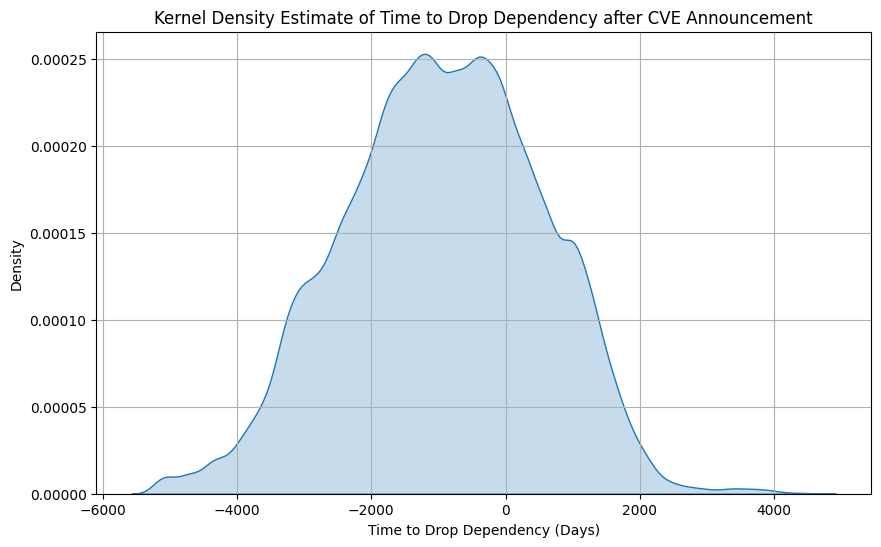

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (ensure you are using the correct CSV file)
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime as well, in case it is not in the correct format
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Check that the columns are in datetime format
print(expanded_with_announcement_df[['User_Artifact', 'Start_Vulnerability', 'End_Vulnerablility', 'AnnouncementDate']].head())

# Now calculate the time difference between 'AnnouncementDate' and 'Start_Vulnerability'
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Filter out rows where 'Time_to_Drop_Dependency' is negative or NaT
#expanded_with_announcement_df = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]

# Plot the Kernel Density Estimate (KDE) graph for the time to drop dependency
plt.figure(figsize=(10, 6))
sns.kdeplot(expanded_with_announcement_df['Time_to_Drop_Dependency'], fill=True)
plt.title('Kernel Density Estimate of Time to Drop Dependency after CVE Announcement')
plt.xlabel('Time to Drop Dependency (Days)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


                                       User_Artifact Start_Vulnerability  \
0  org.infinispan.server:infinispan-server-testsuite 2016-04-12 12:55:38   
1  org.infinispan.server:infinispan-server-testsuite 2016-04-12 12:55:38   
2  org.infinispan.server:infinispan-server-testsuite 2016-04-12 12:55:38   
3                 org.apache.cassandra:cassandra-all 2014-05-30 16:15:04   
4                 org.apache.cassandra:cassandra-all 2014-05-30 16:15:04   

   End_Vulnerablility AnnouncementDate  
0 2018-03-27 19:21:16       2019-09-26  
1 2018-03-27 19:21:16       2014-05-06  
2 2018-03-27 19:21:16       2019-09-26  
3 2024-05-02 14:56:47       2019-09-26  
4 2024-05-02 14:56:47       2014-05-06  


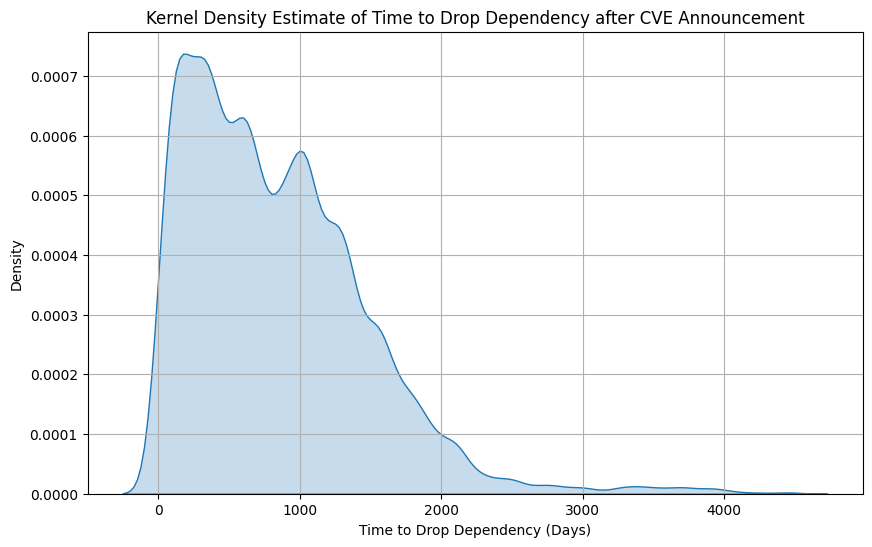

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (ensure you are using the correct CSV file)
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime as well, ensuring that it includes the time
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Normalize the AnnouncementDate to include time (set to midnight if not already)
expanded_with_announcement_df['AnnouncementDate'] = expanded_with_announcement_df['AnnouncementDate'].dt.floor('D')  # Floors to midnight of the day

# Check that the columns are in datetime format
print(expanded_with_announcement_df[['User_Artifact', 'Start_Vulnerability', 'End_Vulnerablility', 'AnnouncementDate']].head())

# Now calculate the time difference between 'AnnouncementDate' and 'Start_Vulnerability'
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Filter out rows where 'Time_to_Drop_Dependency' is negative or NaT
expanded_with_announcement_df = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]

# Plot the Kernel Density Estimate (KDE) graph for the time to drop dependency
plt.figure(figsize=(10, 6))
sns.kdeplot(expanded_with_announcement_df['Time_to_Drop_Dependency'], fill=True)
plt.title('Kernel Density Estimate of Time to Drop Dependency after CVE Announcement')
plt.xlabel('Time to Drop Dependency (Days)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


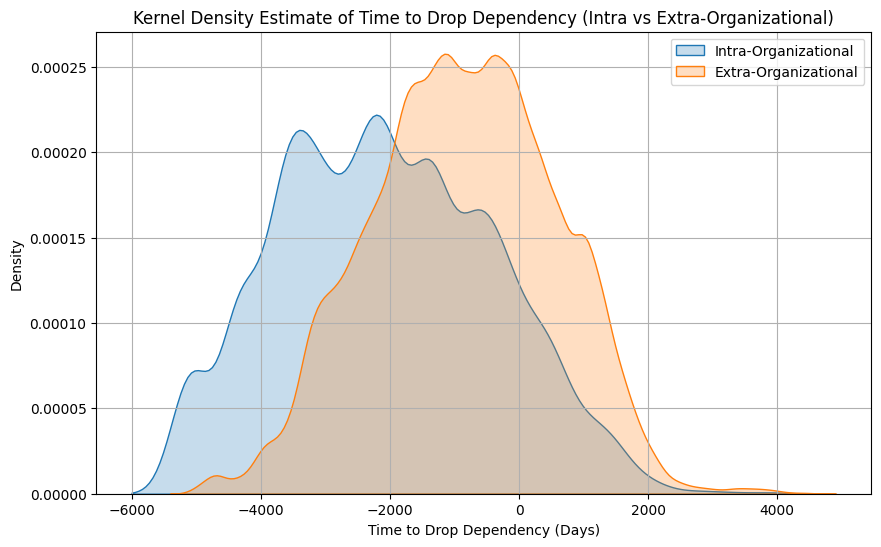

In [ ]:
import pandas as pd

# Load the data (ensure you are using the correct CSV file)
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Calculate time to drop dependency (days between AnnouncementDate and Start_Vulnerability)
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Extract organization name by splitting the string at the colon
expanded_with_announcement_df['User_Org'] = expanded_with_announcement_df['User_Artifact'].str.split(':').str[0]
expanded_with_announcement_df['Vuln_Org'] = expanded_with_announcement_df['Vulnerable_Artifact'].str.split(':').str[0]

# Create a new column to classify as intra- or extra-organizational
expanded_with_announcement_df['Org_Type'] = expanded_with_announcement_df.apply(
    lambda row: 'Intra-Organizational' if row['User_Org'] == row['Vuln_Org'] else 'Extra-Organizational',
    axis=1
)

# Filter out rows with negative or missing time to drop dependency
#expanded_with_announcement_df = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]

# Compare response times (Time to Drop Dependency) for intra- vs extra-organizational users
intra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Intra-Organizational']
extra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Extra-Organizational']

# Plot the distribution of response times (Time to Drop Dependency) for each group
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(intra_organ_users['Time_to_Drop_Dependency'], label='Intra-Organizational', fill=True)
sns.kdeplot(extra_organ_users['Time_to_Drop_Dependency'], label='Extra-Organizational', fill=True)
plt.title('Kernel Density Estimate of Time to Drop Dependency (Intra vs Extra-Organizational)')
plt.xlabel('Time to Drop Dependency (Days)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Import the scipy.stats module
import scipy.stats as stats

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(intra_organ_users['Time_to_Drop_Dependency'].dropna(),
                                           extra_organ_users['Time_to_Drop_Dependency'].dropna(),
                                           alternative='two-sided')

print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")


Mann-Whitney U Statistic: 158342503.0
P-value: 0.0


In [ ]:
# Calculate the number of intra-organizational users
intra_organizational_count = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Intra-Organizational'].shape[0]

# Calculate the total number of users
total_users_count = expanded_with_announcement_df.shape[0]

# Calculate the percentage of intra-organizational users
percentage_intra_organizational = (intra_organizational_count / total_users_count) * 100

# Print the result
print(f"Percentage of intra-organizational users: {percentage_intra_organizational:.2f}%")


Percentage of intra-organizational users: 2.72%


In [ ]:
# Filter users who drop their dependency before the AnnouncementDate
users_dropping_before_announcement = expanded_with_announcement_df[
    expanded_with_announcement_df['Start_Vulnerability'] < expanded_with_announcement_df['AnnouncementDate']
]

# Calculate the count of such users
users_dropping_before_count = users_dropping_before_announcement.shape[0]

# Calculate the total number of users (as before)
total_users_count = expanded_with_announcement_df.shape[0]

# Calculate the percentage of users dropping their dependency before the announcement
percentage_dropping_before_announcement = (users_dropping_before_count / total_users_count) * 100

# Print the result
print(f"Percentage of users dropping dependency before CVE announcement: {percentage_dropping_before_announcement:.2f}%")


Percentage of users dropping dependency before CVE announcement: 72.83%


In [ ]:
# Filter users who drop their dependency before the AnnouncementDate
users_dropping_before_announcement = expanded_with_announcement_df[
    expanded_with_announcement_df['Start_Vulnerability'] < expanded_with_announcement_df['AnnouncementDate']
]

# Create separate dataframes for intra- and extra-organizational users
intra_organ_users = users_dropping_before_announcement[users_dropping_before_announcement['Org_Type'] == 'Intra-Organizational']
extra_organ_users = users_dropping_before_announcement[users_dropping_before_announcement['Org_Type'] == 'Extra-Organizational']

# Calculate the count of such users for both groups
intra_organ_users_count = intra_organ_users.shape[0]
extra_organ_users_count = extra_organ_users.shape[0]

# Calculate the total number of intra- and extra-organizational users
total_intra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Intra-Organizational'].shape[0]
total_extra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Extra-Organizational'].shape[0]

# Calculate the percentage of intra- and extra-organizational users dropping their dependency before the announcement
percentage_intra_organ_dropping_before = (intra_organ_users_count / total_intra_organ_users) * 100
percentage_extra_organ_dropping_before = (extra_organ_users_count / total_extra_organ_users) * 100

# Print the results
print(f"Percentage of intra-organizational users dropping dependency before CVE announcement: {percentage_intra_organ_dropping_before:.2f}%")
print(f"Percentage of extra-organizational users dropping dependency before CVE announcement: {percentage_extra_organ_dropping_before:.2f}%")


Percentage of intra-organizational users dropping dependency before CVE announcement: 88.36%
Percentage of extra-organizational users dropping dependency before CVE announcement: 71.90%


In [ ]:
import scipy.stats as stats

# Create the contingency table
intra_yes = intra_organ_users_count
intra_no = total_intra_organ_users - intra_organ_users_count
extra_yes = extra_organ_users_count
extra_no = total_extra_organ_users - extra_organ_users_count

# Contingency table (2x2)
contingency_table = [[intra_yes, intra_no],
                     [extra_yes, extra_no]]

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test p-value: {p_value:.5f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies: {expected}")


Chi-Square Test p-value: 0.00000
Degrees of Freedom: 1
Expected frequencies: [[ 4124.38995682  1538.61004318]
 [69074.61004318 25768.38995682]]


In [ ]:
import statsmodels.api as sm

# Calculate proportions
intra_proportion = intra_organ_users_count / total_intra_organ_users
extra_proportion = extra_organ_users_count / total_extra_organ_users

# Z-test for two proportions
count = [intra_organ_users_count, extra_organ_users_count]
nobs = [total_intra_organ_users, total_extra_organ_users]
z_stat, p_val = sm.stats.proportions_ztest(count, nobs)

# Print the results
print(f"Z-test p-value: {p_val:.5f}")
print(f"Z-test Statistic: {z_stat:.5f}")


Z-test p-value: 0.00000
Z-test Statistic: 27.04971


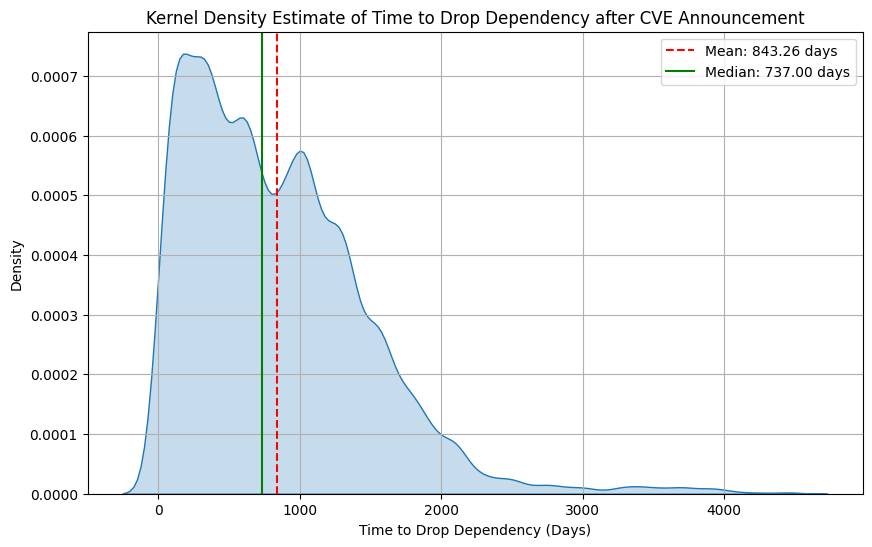

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (ensure you are using the correct CSV file)
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime as well, ensuring that it includes the time
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Normalize the AnnouncementDate to include time (set to midnight if not already)
expanded_with_announcement_df['AnnouncementDate'] = expanded_with_announcement_df['AnnouncementDate'].dt.floor('D')  # Floors to midnight of the day

# Calculate the time difference between 'AnnouncementDate' and 'Start_Vulnerability'
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Filter out rows where 'Time_to_Drop_Dependency' is negative or NaT
expanded_with_announcement_df = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]

# Calculate the mean and median of the 'Time_to_Drop_Dependency'
mean_time = expanded_with_announcement_df['Time_to_Drop_Dependency'].mean()
median_time = expanded_with_announcement_df['Time_to_Drop_Dependency'].median()

# Plot the Kernel Density Estimate (KDE) graph for the time to drop dependency
plt.figure(figsize=(10, 6))
sns.kdeplot(expanded_with_announcement_df['Time_to_Drop_Dependency'], fill=True)

# Add lines for mean and median
plt.axvline(mean_time, color='r', linestyle='--', label=f'Mean: {mean_time:.2f} days')
plt.axvline(median_time, color='g', linestyle='-', label=f'Median: {median_time:.2f} days')

# Title and labels
plt.title('Kernel Density Estimate of Time to Drop Dependency after CVE Announcement')
plt.xlabel('Time to Drop Dependency (Days)')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()


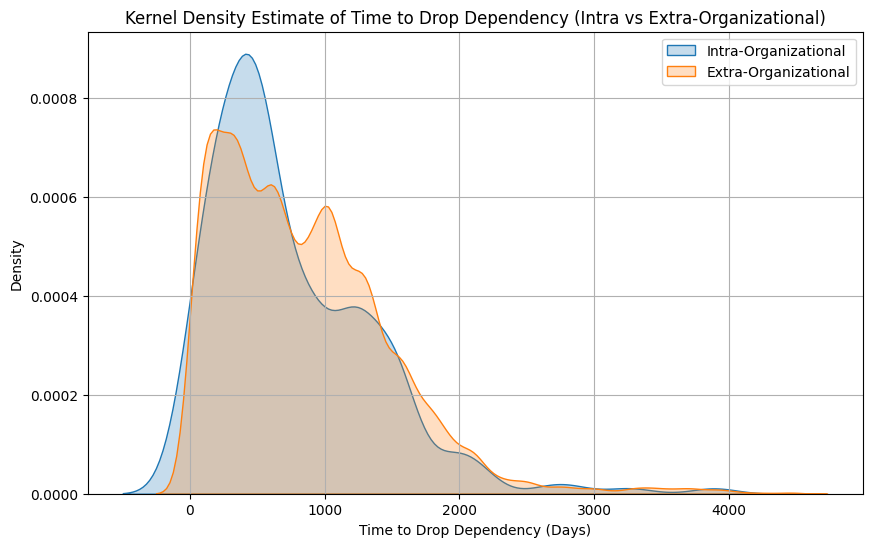

In [ ]:
import pandas as pd

# Load the data (ensure you are using the correct CSV file)
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Calculate time to drop dependency (days between AnnouncementDate and Start_Vulnerability)
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Extract organization name by splitting the string at the colon
expanded_with_announcement_df['User_Org'] = expanded_with_announcement_df['User_Artifact'].str.split(':').str[0]
expanded_with_announcement_df['Vuln_Org'] = expanded_with_announcement_df['Vulnerable_Artifact'].str.split(':').str[0]

# Create a new column to classify as intra- or extra-organizational
expanded_with_announcement_df['Org_Type'] = expanded_with_announcement_df.apply(
    lambda row: 'Intra-Organizational' if row['User_Org'] == row['Vuln_Org'] else 'Extra-Organizational',
    axis=1
)

# Filter out rows with negative or missing time to drop dependency
expanded_with_announcement_df = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]

# Compare response times (Time to Drop Dependency) for intra- vs extra-organizational users
intra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Intra-Organizational']
extra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Extra-Organizational']

# Plot the distribution of response times (Time to Drop Dependency) for each group
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(intra_organ_users['Time_to_Drop_Dependency'], label='Intra-Organizational', fill=True)
sns.kdeplot(extra_organ_users['Time_to_Drop_Dependency'], label='Extra-Organizational', fill=True)
plt.title('Kernel Density Estimate of Time to Drop Dependency (Intra vs Extra-Organizational)')
plt.xlabel('Time to Drop Dependency (Days)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


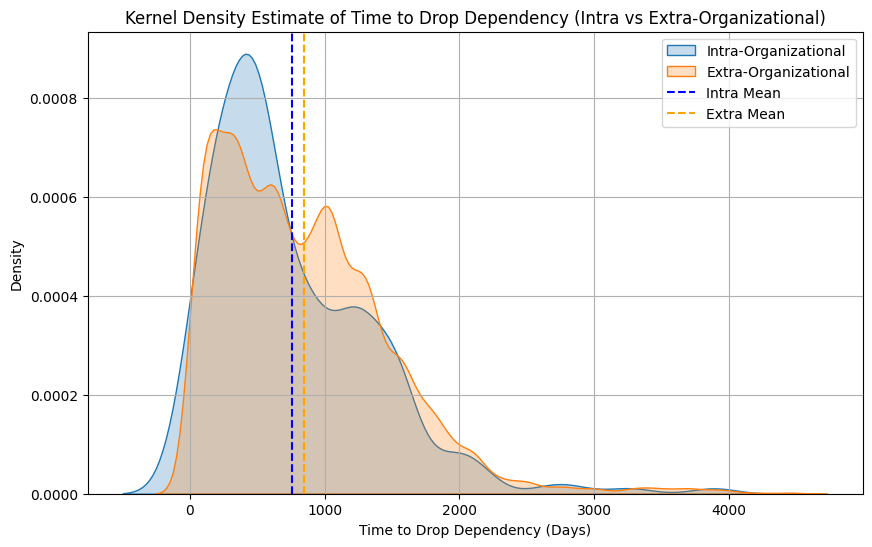

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Calculate time to drop dependency (days between AnnouncementDate and Start_Vulnerability)
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Filter out rows with negative or missing time to drop dependency
expanded_with_announcement_df = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]


# Extract organization name by splitting the string at the colon
expanded_with_announcement_df['User_Org'] = expanded_with_announcement_df['User_Artifact'].str.split(':').str[0]
expanded_with_announcement_df['Vuln_Org'] = expanded_with_announcement_df['Vulnerable_Artifact'].str.split(':').str[0]

# Create a new column to classify as intra- or extra-organizational
expanded_with_announcement_df['Org_Type'] = expanded_with_announcement_df.apply(
    lambda row: 'Intra-Organizational' if row['User_Org'] == row['Vuln_Org'] else 'Extra-Organizational',
    axis=1
)

# Filter out rows with negative or missing time to drop dependency
intra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Intra-Organizational']
extra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Extra-Organizational']

# Calculate means and medians
intra_mean = intra_organ_users['Time_to_Drop_Dependency'].mean()
intra_median = intra_organ_users['Time_to_Drop_Dependency'].median()
extra_mean = extra_organ_users['Time_to_Drop_Dependency'].mean()
extra_median = extra_organ_users['Time_to_Drop_Dependency'].median()

# Plot the KDE with median and mean lines
plt.figure(figsize=(10, 6))

# KDE plots
sns.kdeplot(intra_organ_users['Time_to_Drop_Dependency'], label='Intra-Organizational', fill=True)
sns.kdeplot(extra_organ_users['Time_to_Drop_Dependency'], label='Extra-Organizational', fill=True)

# Add vertical lines for medians and means
plt.axvline(intra_mean, color='blue', linestyle='--', label='Intra Mean')
#plt.axvline(intra_median, color='blue', linestyle='-', label='Intra Median')
plt.axvline(extra_mean, color='orange', linestyle='--', label='Extra Mean')
#plt.axvline(extra_median, color='orange', linestyle='-', label='Extra Median')

# Add titles and labels
plt.title('Kernel Density Estimate of Time to Drop Dependency (Intra vs Extra-Organizational)')
plt.xlabel('Time to Drop Dependency (Days)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


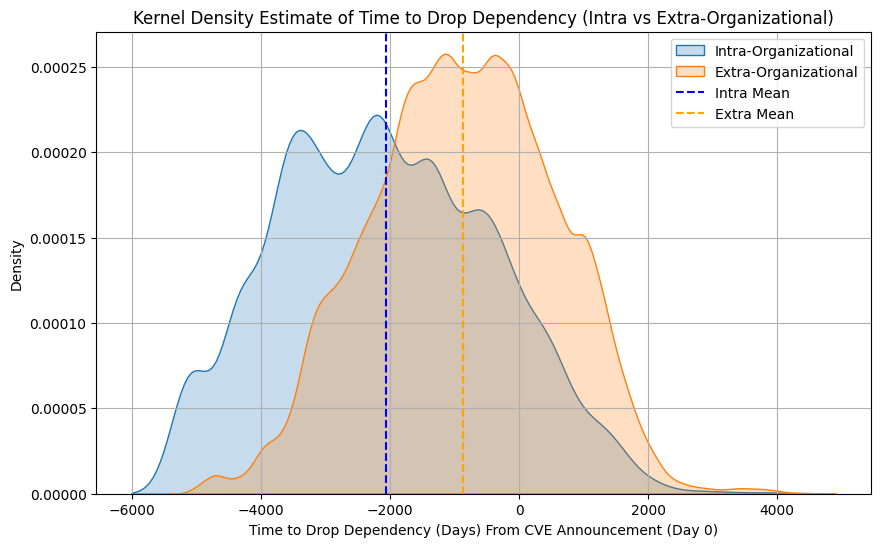

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Calculate time to drop dependency (days between AnnouncementDate and Start_Vulnerability)
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Filter out rows with negative or missing time to drop dependency
# expanded_with_announcement_df = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]


# Extract organization name by splitting the string at the colon
expanded_with_announcement_df['User_Org'] = expanded_with_announcement_df['User_Artifact'].str.split(':').str[0]
expanded_with_announcement_df['Vuln_Org'] = expanded_with_announcement_df['Vulnerable_Artifact'].str.split(':').str[0]

# Create a new column to classify as intra- or extra-organizational
expanded_with_announcement_df['Org_Type'] = expanded_with_announcement_df.apply(
    lambda row: 'Intra-Organizational' if row['User_Org'] == row['Vuln_Org'] else 'Extra-Organizational',
    axis=1
)

# Filter out rows with negative or missing time to drop dependency
intra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Intra-Organizational']
extra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Extra-Organizational']

# Calculate means and medians
intra_mean = intra_organ_users['Time_to_Drop_Dependency'].mean()
intra_median = intra_organ_users['Time_to_Drop_Dependency'].median()
extra_mean = extra_organ_users['Time_to_Drop_Dependency'].mean()
extra_median = extra_organ_users['Time_to_Drop_Dependency'].median()

# Plot the KDE with median and mean lines
plt.figure(figsize=(10, 6))

# KDE plots
sns.kdeplot(intra_organ_users['Time_to_Drop_Dependency'], label='Intra-Organizational', fill=True)
sns.kdeplot(extra_organ_users['Time_to_Drop_Dependency'], label='Extra-Organizational', fill=True)

# Add vertical lines for medians and means
plt.axvline(intra_mean, color='blue', linestyle='--', label='Intra Mean')
#plt.axvline(intra_median, color='blue', linestyle='-', label='Intra Median')
plt.axvline(extra_mean, color='orange', linestyle='--', label='Extra Mean')
#plt.axvline(extra_median, color='orange', linestyle='-', label='Extra Median')

# Add titles and labels
plt.title('Kernel Density Estimate of Time to Drop Dependency (Intra vs Extra-Organizational)')
plt.xlabel('Time to Drop Dependency (Days) From CVE Announcement (Day 0)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


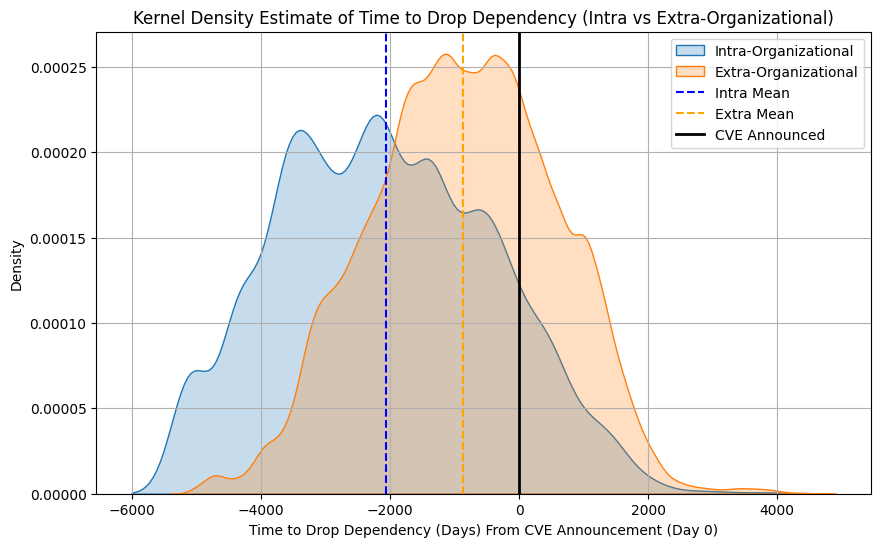

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Calculate time to drop dependency (days between AnnouncementDate and Start_Vulnerability)
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# Extract organization name by splitting the string at the colon
expanded_with_announcement_df['User_Org'] = expanded_with_announcement_df['User_Artifact'].str.split(':').str[0]
expanded_with_announcement_df['Vuln_Org'] = expanded_with_announcement_df['Vulnerable_Artifact'].str.split(':').str[0]

# Create a new column to classify as intra- or extra-organizational
expanded_with_announcement_df['Org_Type'] = expanded_with_announcement_df.apply(
    lambda row: 'Intra-Organizational' if row['User_Org'] == row['Vuln_Org'] else 'Extra-Organizational',
    axis=1
)

# Filter out rows with negative or missing time to drop dependency
intra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Intra-Organizational']
extra_organ_users = expanded_with_announcement_df[expanded_with_announcement_df['Org_Type'] == 'Extra-Organizational']

# Calculate means and medians
intra_mean = intra_organ_users['Time_to_Drop_Dependency'].mean()
intra_median = intra_organ_users['Time_to_Drop_Dependency'].median()
extra_mean = extra_organ_users['Time_to_Drop_Dependency'].mean()
extra_median = extra_organ_users['Time_to_Drop_Dependency'].median()

# Plot the KDE with median and mean lines
plt.figure(figsize=(10, 6))

# KDE plots
sns.kdeplot(intra_organ_users['Time_to_Drop_Dependency'], label='Intra-Organizational', fill=True)
sns.kdeplot(extra_organ_users['Time_to_Drop_Dependency'], label='Extra-Organizational', fill=True)

# Add vertical lines for medians, means, and CVE Announcement
plt.axvline(intra_mean, color='blue', linestyle='--', label='Intra Mean')
plt.axvline(extra_mean, color='orange', linestyle='--', label='Extra Mean')
plt.axvline(0, color='black', linewidth=2, label='CVE Announced')  # Bold black line at 0

# Add titles and labels
plt.title('Kernel Density Estimate of Time to Drop Dependency (Intra vs Extra-Organizational)')
plt.xlabel('Time to Drop Dependency (Days) From CVE Announcement (Day 0)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy import stats

# Shapiro-Wilk test for normality (Intra-Organizational group)
stat_intra, p_intra = stats.shapiro(intra_organ_users['Time_to_Drop_Dependency'].dropna())
print(f"Intra-Organizational Normality Test p-value: {p_intra}")

# Shapiro-Wilk test for normality (Extra-Organizational group)
stat_extra, p_extra = stats.shapiro(extra_organ_users['Time_to_Drop_Dependency'].dropna())
print(f"Extra-Organizational Normality Test p-value: {p_extra}")


Intra-Organizational Normality Test p-value: 6.379438325551247e-24
Extra-Organizational Normality Test p-value: 3.926108661886294e-37


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5663.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 94842.
  res = hypotest_fun_out(*samples, **kwds)


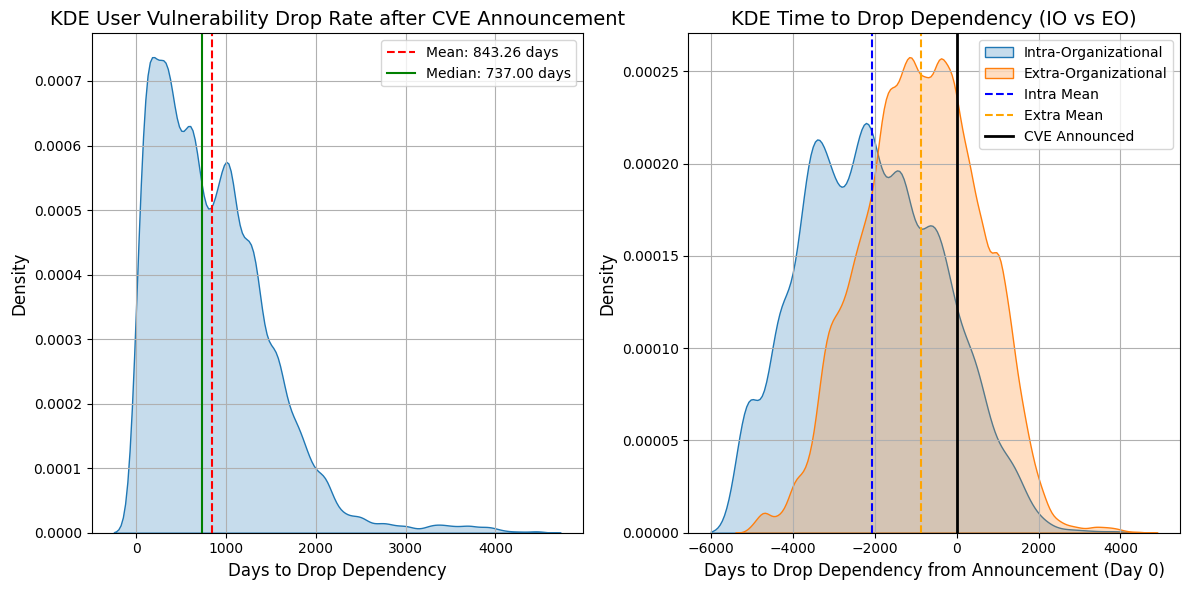

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
expanded_with_announcement_df = pd.read_csv('/content/Expanded_FINAL_with_AnnouncementDate.csv')

# Convert Unix timestamps to datetime (milliseconds to seconds)
expanded_with_announcement_df['Start_Vulnerability'] = pd.to_datetime(expanded_with_announcement_df['Start_Vulnerability'], unit='ms')
expanded_with_announcement_df['End_Vulnerablility'] = pd.to_datetime(expanded_with_announcement_df['End_Vulnerablility'], unit='ms')

# Convert the 'AnnouncementDate' to datetime
expanded_with_announcement_df['AnnouncementDate'] = pd.to_datetime(expanded_with_announcement_df['AnnouncementDate'], errors='coerce')

# Normalize the AnnouncementDate to include time (set to midnight if not already)
expanded_with_announcement_df['AnnouncementDate'] = expanded_with_announcement_df['AnnouncementDate'].dt.floor('D')  # Floors to midnight of the day

# Calculate the time difference between 'AnnouncementDate' and 'Start_Vulnerability'
expanded_with_announcement_df['Time_to_Drop_Dependency'] = (expanded_with_announcement_df['Start_Vulnerability'] - expanded_with_announcement_df['AnnouncementDate']).dt.days

# **Left graph:** Filter out rows where 'Time_to_Drop_Dependency' is negative or NaT
expanded_with_announcement_df_left = expanded_with_announcement_df[expanded_with_announcement_df['Time_to_Drop_Dependency'] >= 0]

# Calculate the mean and median of the 'Time_to_Drop_Dependency' for the left plot
mean_time_left = expanded_with_announcement_df_left['Time_to_Drop_Dependency'].mean()
median_time_left = expanded_with_announcement_df_left['Time_to_Drop_Dependency'].median()

# Create figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# **First plot (Left graph):** KDE for Time to Drop Dependency after CVE Announcement
sns.kdeplot(expanded_with_announcement_df_left['Time_to_Drop_Dependency'], fill=True, ax=axs[0])

# Add lines for mean and median
axs[0].axvline(mean_time_left, color='r', linestyle='--', label=f'Mean: {mean_time_left:.2f} days')
axs[0].axvline(median_time_left, color='g', linestyle='-', label=f'Median: {median_time_left:.2f} days')

# Title and labels for first plot (Left graph)
axs[0].set_title('KDE User Vulnerability Drop Rate after CVE Announcement', fontsize=14)
axs[0].set_xlabel('Days to Drop Dependency', fontsize=12)
axs[0].set_ylabel('Density', fontsize=12)
axs[0].legend()
axs[0].grid(True)

# **Second plot (Right graph):** KDE for Intra- and Extra-Organizational Time to Drop Dependency (including negative values)

# Extract organization names for second plot
expanded_with_announcement_df['User_Org'] = expanded_with_announcement_df['User_Artifact'].str.split(':').str[0]
expanded_with_announcement_df['Vuln_Org'] = expanded_with_announcement_df['Vulnerable_Artifact'].str.split(':').str[0]

# Create a new column to classify as intra- or extra-organizational
expanded_with_announcement_df['Org_Type'] = expanded_with_announcement_df.apply(
    lambda row: 'Intra-Organizational' if row['User_Org'] == row['Vuln_Org'] else 'Extra-Organizational',
    axis=1
)

# Filter out rows with missing values (but keep negative values for the second plot)
expanded_with_announcement_df_clean = expanded_with_announcement_df.dropna(subset=['Time_to_Drop_Dependency'])

# For the second plot, do NOT filter out negative values
intra_organ_users = expanded_with_announcement_df_clean[expanded_with_announcement_df_clean['Org_Type'] == 'Intra-Organizational']
extra_organ_users = expanded_with_announcement_df_clean[expanded_with_announcement_df_clean['Org_Type'] == 'Extra-Organizational']

# Plot the KDE with median and mean lines for the second plot
sns.kdeplot(intra_organ_users['Time_to_Drop_Dependency'], label='Intra-Organizational', fill=True, ax=axs[1])
sns.kdeplot(extra_organ_users['Time_to_Drop_Dependency'], label='Extra-Organizational', fill=True, ax=axs[1])

# Add vertical lines for means, medians, and CVE Announcement
axs[1].axvline(intra_organ_users['Time_to_Drop_Dependency'].mean(), color='blue', linestyle='--', label='Intra Mean')
axs[1].axvline(extra_organ_users['Time_to_Drop_Dependency'].mean(), color='orange', linestyle='--', label='Extra Mean')
axs[1].axvline(0, color='black', linewidth=2, label='CVE Announced')  # Bold black line at 0

# Add titles and labels for second plot (Right graph)
axs[1].set_title('KDE Time to Drop Dependency (IO vs EO)', fontsize=14)
axs[1].set_xlabel('Days to Drop Dependency from Announcement (Day 0)', fontsize=12)
axs[1].set_ylabel('Density', fontsize=12)
axs[1].legend()
axs[1].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()
